# Python's Next Top Model
By The Good, The Bad and the Ugly aka. The Three Musketeers.

Welcome back to the wonderful Python universe of Credible Threats. We will continue the exploration of movies, and we're sure that our data project notebook will look at this notebook and think, *you complete me*. You might want to ask, *Magic mirror on the wall, who's the fairest one of all*, and the answer will be this notebook. This notebook will try to estimate the IMDb ratings of movies. And as a bonus, we even have a live-updating figure, which will leave you thinking, *it's alive, it's alive*. 

We will calculate the utility of each movie, given genres, awards, duration and so forth, and we will try to calculate the IMDb ratings for each movie, based on this utility. Finally, we will minimize the distance between our estimated ratings and the actual IMDb ratings. Now, we're sure you're thinking, *show me the money*, so this is it. 

Our utility function is given by: 
$$ U_i = \sum_{k=1}^{23}(\alpha_k G_{ik}) + \sum_{k=1920}^{2010} (\beta_k D_{ik}) + \gamma N_i + \delta W_i + \rho L_i $$. 

$$\text{Where, } G_{ik} \text{ is genre } k \text{, } D_{ik} \text{ is decade } k \text{, } N_i \text{ is nominations, } W_i \text{ is number of wins and } L_i \text{ is duration. } $$ 

I think we can agree, it is *beauty kills the beast*. 
Now, based on this utility function, we will estimate the ratings of each movies,
$$ R_i^{model} = \frac{\exp(\omega x_i')}{1 + \exp(\omega x_i')} $$ 

where, 
$$ x_i = \big[G_1, G_2, ..., G_{23}, D_{1920}, D_{1930}, ..., D_{2010}, N_i, W_i, L_i \big] $$
$$ \omega = \big[\alpha_1, \alpha_2, ..., \alpha_{23}, \beta_{1920}, \beta_{1930}, \beta_{2010}, \gamma, \delta, \rho_1 \big] $$

*Yippie-ki-yay, motherfucker*, it's that nice? 

We then use optimize methods to solve the following: 
$$ \min_{\omega} \Big\{ \sum_{i=1}^{n} \left( R_i^{model} - R_i^{data} \right)^2 \Big\} $$

where, 
$$ R_i^{model}$$ are the ratings from the dataset. 


Throughout our notebook, you might *feel the need - the need for speed*. But, *patience you must have, my young Padawan*, because optimizing takes time. 

*Of all the python notebooks in all the towns in all the world, you walk into ours*. How lucky you are, you'll soon see why. 

So, *say hello to my little friend*, Python's next top model.  
Let's *get busy coding, or get busy dying*. 


In [3]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np
import itertools
from ipywidgets import Layout
import math

import time
from scipy import linalg
import scipy.optimize as optimize
import sympy as sm

In [5]:
# List for later use 
variables = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
            'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
            'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
            'decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
            'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010',
            'nrOfNominations','nrOfWins','duration']

vars_dec = ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
        'Drama','Family','Fantasy','FilmNoir','History','Horror','Music','Musical',
        'Mystery','Romance','SciFi','Short','Sport','Thriller','War','Western',
        'nrOfNominations','nrOfWins','duration']

decade_list = [1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


# Function to calculate squared mean differences 

# OBS: Tilføj evt. andre datadrames and variables (kommentar til Jake)
def sqr_diff_sum(df_X,pars):
    """ Generates a float of the sum of squared differences between the ratings from the data and the model. 

    Args: 
        df_X (DataFrame): DataFrame containing the variable in x for all observations.
        pars (List): List of parameters in omega

    Returns: 
        A float.
    """
    # Calculate the matrix product between omega and X
    util = df_X@pars  
    # Scale the product so is between 0 and 10. This is the R_model
    df_Y['rat_model'] = 10*np.exp(util)/(1+np.exp(util)) 
    # Calculate the squared difference between R_data and R_model
    df_Y['sqr_diff'] = (df_Y['rat_model']-df_Y['rat_data'])**2 

    return df_Y['sqr_diff'].sum() # Returns the sum of the squared differences

## Solving the model

In [ ]:
## SEBS kode med live-figur

In [ ]:
## Idas kode med parameter convergens

In [ ]:
## OBS: Følgende skal lige tjekkes igennem når SEB har sat kode ind (kommentar til Jake)

def optimizer(keep_top=None):
    global fs
    global evals
    global x0
    global df
    
    def sqr_diff_sum(df_X,pars):
        util = df_X@pars
        df_Y['rat_model'] = 10*np.exp(util)/(1+np.exp(util))
        df_Y['sqr_diff'] = (df_Y['rat_model']-df_Y['rat_data'])**2
        return df_Y['sqr_diff'].sum()

    # Scipy minimize
    def zeros(n): 
        list = [0] * n
        return list 

    df_X, df_Y = df_s(keep_top)
    x0 = zeros(len(variables))
    evals = 0
    
    obj_fun = lambda x: sqr_diff_sum(df_X,x)
        
    result = optimize.minimize(obj_fun,x0,
                               method="Nelder-Mead",
                               options={"disp":True, "maxiter":50000}, # display the results
                               ) 

    
    return result

results = [result.x] # Empty list to store results ######## OBS! ##########

# This loop solve the model for the top 500, 1000, and 2000 movies
for i in [500, 1000, 2000]:
    res_temp = optimizer(keep_top=i)
    temp = res_temp.x
    results.append(temp) # Store the results in the 'results-list'

interactive(children=(Dropdown(description='Nr. of movies', options=('All', 500, 1000, 2000), value='All'), Ou…

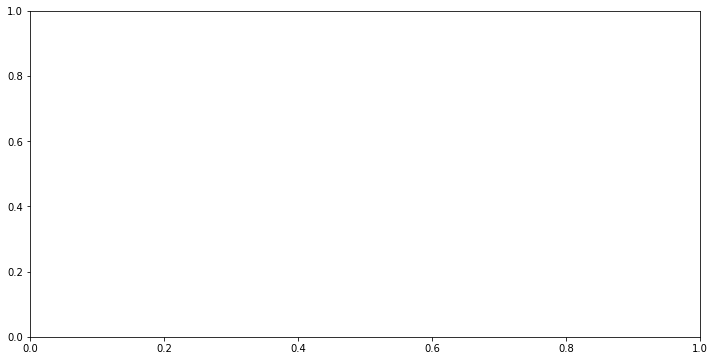

In [6]:
## The code creates an interactive plot of the estimated parameters for all variables. 
## In the interactive part you can choose between estimates when the model is solved 
## for all movies or just top top 500, 1000, or 2000 rated movies. 

def fig_2(val):
    """ Generates a figure which plots estimated parameters for all variables.

    Args: 
        val (string or int): Should be one of the elements in the options-list

    Returns: 
        One interactive plot.  

    Notice: 
        The function is generated so that it can be called using widgets.interact. 
        Thus, it is not intended to be used on its own. 
    """    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,1,1)
    
    # Plots the estimated parameters for the chosen sample of movies
    ax1.bar(vars2, results[options.index(val)], label=f'Estimates with {options[options.index(val)]} movies')
    
    # Scatter plot with the estimated paramters for the entire sample 
    ax1.scatter(vars2, results[0], marker='D', s=15, zorder=2, label='Estimates with all movies')
    
    # Legends and labels 
    ax1.legend(loc="lower right")
    ax1.set_ylabel('Parameter estimates')
    ax1.set_title(f'Parameter estimates for {options[options.index(val)]} movies')
    ax1.set_ylim([-0.7,0.7])
    ax1.axhline(y=0,color='black',linewidth=1)
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
        
options = ['All', 500, 1000, 2000] # Option list

# Making the figure interactive so the estimates are shown for the chosen sample size 
widgets.interact(fig_2,
    val = widgets.Dropdown(description='Nr. of movies', value='All', options=options, 
                ),
);   

## Robustness checks

In [ ]:
## SEBS kode med et eller andet om hvor god modellen

In [2]:
## The following code produces the parameter estimates where the sample is restricted to all the decades,
## one at the time. The function return a list which contains a list of the estimates for every decade.

## OBS: The code will take about 3-4 minutes to run due to the model is estimated 10 times!!

def optimizer_dec():
    """ Generates a list containing 10 list with estimates of the model for every decade. 
    
    Args: 
        No arguments are needed.
        
    Returns: 
        A list.
        
    Notice: 
        It will raise an error if the function are given an argument!
    """
    
    # Defining a function to calculate the sum of squared differences 
    # between the ratings from the data and from the model. 
    def sqr_diff_sum(df_X,pars):
        """ Generates a float of the sum of squared differences between the ratings from the data and the model. 

        Args: 
            df_X (DataFrame): DataFrame containing the variable in x for all observations.
            pars (List): List of parameters in omega

        Returns: 
            A float.
        """
        
        util = df_X@pars  # Calculate the matrix product between omega and X
        df_Y['rat_model'] = 10*np.exp(util)/(1+np.exp(util)) # Scale the product so is between 0 and 10. This is the R_model
        df_Y['sqr_diff'] = (df_Y['rat_model']-df_Y['rat_data'])**2 # Calculate the squared difference between R_data and R_model
        return df_Y['sqr_diff'].sum() # Returns the sum of the squared differences
                
    result = [] # Emty list to store the estimated parameters
    
    # Make a loop so the model is estimated for all ten decade
    for decade in decade_list:      
        df_X, df_Y = df_dec(decade) # Call the function to generate the two dataframes
        x0 = np.zeros(len(vars_dec)) # Starting values 
    
        obj_fun = lambda x: sqr_diff_sum(df_X,x) # The objective function -> sum of squared differences
        
        # Use Scipy optimizer to solve the model
        result_i = optimize.minimize(obj_fun,x0,
                               method='Nelder-Mead',
                               options={"disp":True, "maxiter":50000}, # display the results
                               );
        
        # Add the result for each deacde to the result-list
        result.append(list(result_i.x)) 
                      
    return result # Returns the result-list

# Call the optimize_dec function
result_dec = optimizer_dec()

NameError: name 'decade_list' is not defined

In [ ]:
## The following code produces a figure with the estimated parameters for each deacde for a chosen variable 


result_dec_mod = [] # Empty list to storage 

# The loop changes the order of the result-list so the 
# estimates are ordered by the variables and subordered by decade 
# insted of being ordered by decade and subordered by variables 
for j,var in enumerate(vars):
    temp = []
    for i,dec in enumerate(decade_list):
        temp.append(result_dec[i][j])
    
    result_dec_mod.append(temp)    
    
# Defining a figure to plot the estimates 
def fig(var):
    """ Generates a figure which plots estimated parameters for each decade for one variable 

    Args: 
        var (string): Should be one of the variables in the X-vector

    Returns: 
        One interactive plot.  

    Notice: 
        The function is generated so that it can be called using widgets.interact. 
        Thus, it is not intended to be used on its own. 
        """
    fig = plt.figure(figsize=(8,6))
    ax1 = fig.add_subplot(1,1,1)
    
    
    ax1.bar(decade_list, result_dec_mod[vars.index(var)],width=6)
    
    # Setting labels, ticks etc. 
    ax1.set_ylabel('Parameter estimates')
    ax1.set_title(f'Parameter estimates for {var} per decade')
    ax1.set_xticks(decade_list)
    ax1.axhline(y=0,color='black',linewidth=1)

# Making the figure interactive so the estimates are shown for the chosen variable 
widgets.interact(fig,
    var = widgets.Dropdown(description='Variable', value='Action', options=vars, 
                ),
);    

## Conclusion...